In [2]:
import numpy as np
import python.middlebury
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
I1 = plt.imread("data/nasa/nasa9.png")
I2 = plt.imread("data/nasa/nasa10.png")

In [22]:
def gradHorn(I1,I2):

    kernel_y = np.array([
        [0,0,0],
        [0,-1,-1],
        [0,1,1]
    ])

    kernel_x = np.array([
        [0,0,0],
        [0,-1,1],
        [0,-1,1]
    ])

    kernel_t = np.array([
        [0,0,0],
        [0,1,1],
        [0,1,1]
    ])

    Ix1 = sp.signal.convolve2d(I1, kernel_x, boundary='symm', mode='same')
    Ix2 = sp.signal.convolve2d(I2, kernel_x, boundary='symm', mode='same')

    Ix = 0.25 * (Ix1 + Ix2)

    Iy1 = sp.signal.convolve2d(I1, kernel_y, boundary='symm', mode='same')
    Iy2 = sp.signal.convolve2d(I2, kernel_y, boundary='symm', mode='same')

    Iy = 0.25 * (Iy1 + Iy2)

    It1 = sp.signal.convolve2d(I1, kernel_t, boundary='symm', mode='same')
    It2 = sp.signal.convolve2d(I2, kernel_t, boundary='symm', mode='same')

    It = 0.25 * (It1 - It2)

    return Ix, Iy, It

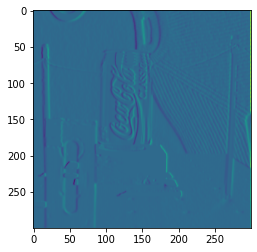

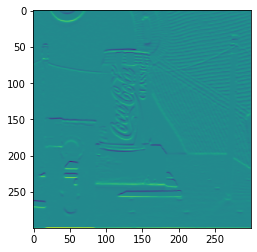

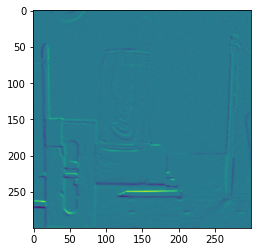

In [23]:
Ix, Iy, It = gradHorn(I1,I2)


plt.imshow(Ix)
plt.show()

plt.imshow(Iy)
plt.show()

plt.imshow(It)
plt.show()

In [34]:
def horn(I1,I2,alpha, N):
    A = np.array([
        [1/12,1/6,1/12],
        [1/6,0,1/6],
        [1/12,1/6,1/12]
    ])

    u = np.zeros_like(I1)
    v = np.zeros_like(I1)

    Ix, Iy, It = gradHorn(I1,I2)

    bigBot = alpha + np.power(Ix,2) + np.power(Iy,2)

    for i in range(N):

        umin = sp.signal.convolve2d(u, A, boundary='symm', mode='same')
        vmin = sp.signal.convolve2d(v, A, boundary='symm', mode='same')

        bigTop = Ix*umin+Iy*vmin+It
        

        big = bigTop/bigBot

        u = umin - Ix*big
        u = vmin - Iy*big

    return u,v

In [33]:
u,v = horn(I1,I2,0.01, 1250)

w = np.dstack((u,v,np.zeros_like(v)))

img = python.middlebury.computeColor(w)


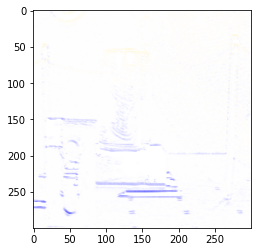

In [32]:
plt.imshow(img)